### Project 2 - NYPD Complaint Historic Data

#### Outline:
##### 1. Data Importing/Cleaning/Filtering
##### 2. Statistics
##### 3. Visualizations
##### 4. Conclusion

##### 1. Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import numpy as np
from collections import Counter

nypd = pd.read_csv('/Users/pps/Documents/Data/Python/Python for Data Analytics/Projects/Project_2/NYPD_Complaint_Data_Historic.csv', low_memory=False)

#### *1B. Getting to the know the data*

In [4]:
nypd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7825499 entries, 0 to 7825498
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  float64
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

In [5]:
# Check for any missing values in dataframe

nypd.isnull().sum().sum()

56781886

In [6]:
# If there are missing values, in what columns

nypd.isnull().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1744294
CMPLNT_TO_TM         1739479
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18832
PD_CD                   6761
PD_DESC                 6761
CRM_ATPT_CPTD_CD         168
LAW_CAT_CD                 0
BORO_NM                12480
LOC_OF_OCCUR_DESC    1618063
PREM_TYP_DESC          42015
JURIS_DESC                 0
JURISDICTION_CODE       6761
PARKS_NM             7794644
HADEVELOPT           7477110
HOUSING_PSA          7226206
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4883369
SUSP_RACE            3514828
SUSP_SEX             3648142
TRANSIT_DISTRICT     7653024
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             7218
STATION_NAME         7653024
VIC_AGE_GROUP        1638445
VIC_RACE                 390
VIC_SEX       

In [7]:
# Looking at the data

nypd.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F
1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,...,F,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D


#### *Next Section contains Data Cleaning and some Statistics*

In [8]:
# Splitting column to obtain "Month" and "Year" column

nypd[["Month","Day","Complaint Year"]] = nypd['CMPLNT_FR_DT'].str.split("/",expand=True)

In [9]:
# Splitting column to get Borough

nypd[["1","2","Borough","4"]] = nypd['PATROL_BORO'].str.split(" ",expand=True)

In [10]:
nypd.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Month,Day,Complaint Year,1,2,Borough,4
0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,25-44,WHITE,F,03,29,2018,PATROL,BORO,MAN,NORTH
1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,333.0,...,UNKNOWN,UNKNOWN,D,02,06,2018,PATROL,BORO,BRONX,None
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,...,UNKNOWN,UNKNOWN,D,11,21,2018,PATROL,BORO,BKLYN,NORTH
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,18-24,WHITE HISPANIC,F,06,09,2018,PATROL,BORO,MAN,SOUTH
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,...,UNKNOWN,UNKNOWN,D,11,10,2018,PATROL,BORO,MAN,NORTH


In [11]:
nypd['Borough'].value_counts(sort=False)

MAN       1882063
BRONX     1694758
BKLYN     2314644
QUEENS    1564806
STATEN     362010
Name: Borough, dtype: int64

In [12]:
# Replacing the above values with full spelling of boroughs

nypd['Borough'].replace(['MAN','BKLYN','STATEN'],['MANHATTAN','BROOKLYN','STATEN ISLAND'],inplace=True)

In [13]:
# Checking replacemnt
 
nypd['Borough'].value_counts()

BROOKLYN         2314644
MANHATTAN        1882063
BRONX            1694758
QUEENS           1564806
STATEN ISLAND     362010
Name: Borough, dtype: int64

In [16]:
# Looking for the latest year avaliable in the data

##nypd['Complaint Year'].max()

In [22]:
# Filter the dataframe for 2019

filt = nypd['Complaint Year']=='2019'
nypd = nypd.loc[filt]
nypd['Complaint Year'].value_counts()

2019    458441
Name: Complaint Year, dtype: int64

In [23]:
# Does the 2019 dataset have unique complaint numbers?

nypd['CMPLNT_NUM'].is_unique

True

In [24]:
# Number of complaints by borough

nypd['Borough'].value_counts()

BROOKLYN         131698
MANHATTAN        115419
BRONX            100263
QUEENS            91905
STATEN ISLAND     18855
Name: Borough, dtype: int64

In [25]:
# Number of complaints by Offense

nypd['OFNS_DESC'].value_counts()

PETIT LARCENY                       89071
HARRASSMENT 2                       71682
ASSAULT 3 & RELATED OFFENSES        52783
CRIMINAL MISCHIEF & RELATED OF      46875
GRAND LARCENY                       42682
                                    ...  
UNLAWFUL POSS. WEAP. ON SCHOOL          3
OFFENSES AGAINST MARRIAGE UNCL          1
KIDNAPPING AND RELATED OFFENSES         1
OTHER STATE LAWS (NON PENAL LAW)        1
OTHER TRAFFIC INFRACTION                1
Name: OFNS_DESC, Length: 63, dtype: int64

In [26]:
# Number of complaints by Victim sex

nypd['VIC_SEX'].value_counts(sort=False)

F    182207
M    160895
E     49716
D     65620
Name: VIC_SEX, dtype: int64

In [27]:
nypd.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Month', 'Day',
       'Complaint Year', '1', '2', 'Borough', '4'],
      dtype='object')

In [28]:
# Creating a subset with only the columns needed for analysis

nypd2 = nypd[['CMPLNT_NUM','OFNS_DESC','VIC_SEX','Borough','Month','Complaint Year']]

In [29]:
nypd2.head()

,CMPLNT_NUM,OFNS_DESC,VIC_SEX,Borough,Month,Complaint Year
681149,498849139,HARRASSMENT 2,F,QUEENS,12,2019
681210,195931501,GRAND LARCENY,M,MANHATTAN,12,2019
681231,139094512,PETIT LARCENY,F,MANHATTAN,12,2019
681252,696904327,GRAND LARCENY OF MOTOR VEHICLE,M,BROOKLYN,12,2019
681331,752468886,HARRASSMENT 2,M,BROOKLYN,12,2019


In [30]:
# Importing new dataframe into a csv

nypd2.to_csv('/Users/pps/Documents/Data/Python/Python for Data Analytics/Projects/Project_2/data.csv')

In [31]:
# Checking for missing values in new dataframe 

nypd2.isnull().sum().sum()

312

In [32]:
# What columns contain the missing data 

nypd2.isnull().sum()

CMPLNT_NUM          0
OFNS_DESC           8
VIC_SEX             3
Borough           301
Month               0
Complaint Year      0
dtype: int64

In [33]:
# Renaming columns and saving it in a new dataframe

nypd2=nypd2.rename(columns={ 'OFNS_DESC' : 'Offense','VIC_SEX': 'Victim Gender', 'Month':'Complaint Month'})

In [34]:
# checking to see if I get the same counts by borough using count() and value_counts()

nypd2.groupby(['Borough'])['CMPLNT_NUM'].count()

Borough
BRONX            100263
BROOKLYN         131698
MANHATTAN        115419
QUEENS            91905
STATEN ISLAND     18855
Name: CMPLNT_NUM, dtype: int64

In [35]:
nypd2['Borough'].value_counts()

BROOKLYN         131698
MANHATTAN        115419
BRONX            100263
QUEENS            91905
STATEN ISLAND     18855
Name: Borough, dtype: int64

In [36]:
# Creating another dataframe filtering only for Brooklyn

filt = nypd2['Borough']=='BROOKLYN'
nypd3 = nypd2.loc[filt]

In [37]:
nypd3['Borough'].value_counts()

BROOKLYN    131698
Name: Borough, dtype: int64

In [38]:
# Counts by offense in Brooklyn

nypd3['Offense'].value_counts()

PETIT LARCENY                           24384
HARRASSMENT 2                           20494
ASSAULT 3 & RELATED OFFENSES            14465
CRIMINAL MISCHIEF & RELATED OF          13811
GRAND LARCENY                           11226
FELONY ASSAULT                           6047
OFF. AGNST PUB ORD SENSBLTY &            5983
MISCELLANEOUS PENAL LAW                  5465
ROBBERY                                  4020
BURGLARY                                 3565
DANGEROUS DRUGS                          3194
DANGEROUS WEAPONS                        2265
VEHICLE AND TRAFFIC LAWS                 2046
SEX CRIMES                               1885
FORGERY                                  1823
GRAND LARCENY OF MOTOR VEHICLE           1775
OFFENSES AGAINST PUBLIC ADMINI           1642
INTOXICATED & IMPAIRED DRIVING           1389
THEFT-FRAUD                              1072
CRIMINAL TRESPASS                         872
UNAUTHORIZED USE OF A VEHICLE             575
RAPE                              

In [39]:
# Creating another data set filtering down using offense column

filt = nypd3['Offense']=='PETIT LARCENY'
nypd4 = nypd3.loc[filt]

In [40]:
nypd4['Offense'].value_counts()

PETIT LARCENY    24384
Name: Offense, dtype: int64

In [41]:
nypd4.groupby(['Victim Gender','Complaint Month'])['CMPLNT_NUM'].count()

Victim Gender  Complaint Month
D              01                 693
               02                 601
               03                 625
               04                 715
               05                 741
               06                 749
               07                 861
               08                 768
               09                 821
               10                 836
               11                 699
               12                 694
E              01                   4
               02                   5
               03                   2
               04                   9
               05                   4
               06                   8
               07                   7
               08                   2
               09                   6
               10                   3
               11                   3
               12                   3
F              01                 502
               02  

In [42]:
# Assumed the E value is for Error and D value is for Did Not Indicate, replacing those values with A = Anonymous

nypd4 = nypd4.replace(['E','D'], 'A')

In [43]:
nypd4.groupby(['Victim Gender','Complaint Month'])['CMPLNT_NUM'].count()

Victim Gender  Complaint Month
A              01                 697
               02                 606
               03                 627
               04                 724
               05                 745
               06                 757
               07                 868
               08                 770
               09                 827
               10                 839
               11                 702
               12                 697
F              01                 502
               02                 442
               03                 504
               04                 508
               05                 522
               06                 558
               07                 615
               08                 635
               09                 605
               10                 625
               11                 574
               12                 689
M              01                 640
               02  

### *3. Visualizations*

#### *3B. Bar Chart*

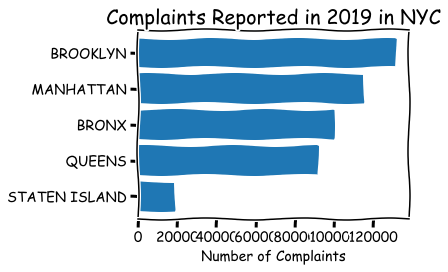

In [44]:
plt.xkcd() #style for chart

with open('Data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file) 
    # Counter() counts every instance of the object in the data
    borough_counter = Counter() 
    # Now we loop all our data and we want to do with the data within the list of boroughs
    for row in csv_reader:      
        borough_counter.update(row['Borough'].split(';'))

# set two empty lists
boroughs = []
complaints = []

# loop over all the tuples we get back from the most_common() method
for item in borough_counter.most_common(5): # 5 was used to bring back top 5 this will exclude the missing values
    # First value
    boroughs.append(item[0])
    # Second Value
    complaints.append(item[1])

# reverse() reverses the list in place
boroughs.reverse() 
complaints.reverse()    
    
plt.barh(boroughs, complaints)

plt.title('Complaints Reported in 2019 in NYC',fontsize=20)
plt.xlabel('Number of Complaints')

plt.tight_layout() 

plt.rcdefaults() # resets rc due to xkcd style
plt.rcParams["figure.figsize"] = (10,10) # sizes chart

#### *3C. Pie Chart*

Text(0.5, 1.0, 'Top 5 Offenses in Brooklyn (2019)')

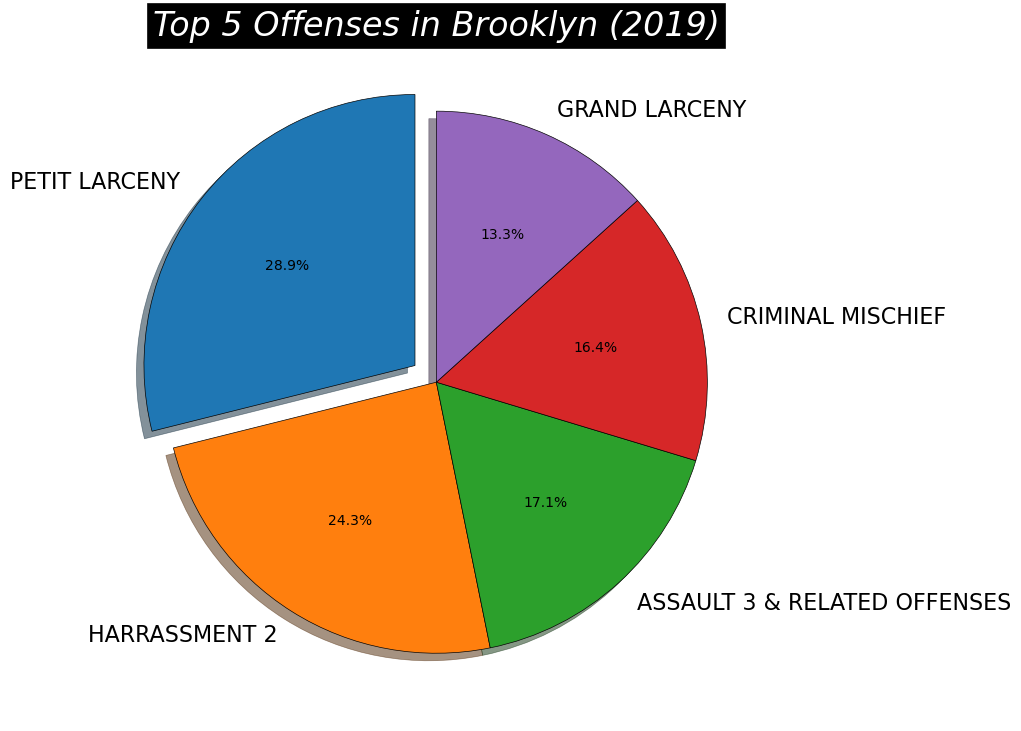

In [45]:

plt.rcdefaults() # reset rc parameters
plt.style.use('seaborn-poster')

"""
Top Offenses in BK
PETIT LARCENY                           24384
HARRASSMENT 2                           20494
ASSAULT 3 & RELATED OFFENSES            14465
CRIMINAL MISCHIEF & RELATED OF          13811
GRAND LARCENY                           11226
"""

slices = [24384, 20494, 14465, 13811, 11226] # values for slices
labels = ['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES', 'CRIMINAL MISCHIEF', 'GRAND LARCENY ']
explode = [0.1,0,0,0,0] # makes slices move away from radius

# formatting
plt.pie(slices, labels=labels, explode = explode, shadow = True,
        startangle =90, autopct='%1.1f%%', # autopct adds percentages
        wedgeprops={'edgecolor': 'black'})

# title formatting
plt.title("Top 5 Offenses in Brooklyn (2019)", fontsize=24, color="white",
          fontstyle='italic', backgroundcolor = 'black')


#### *3D. Line Chart*

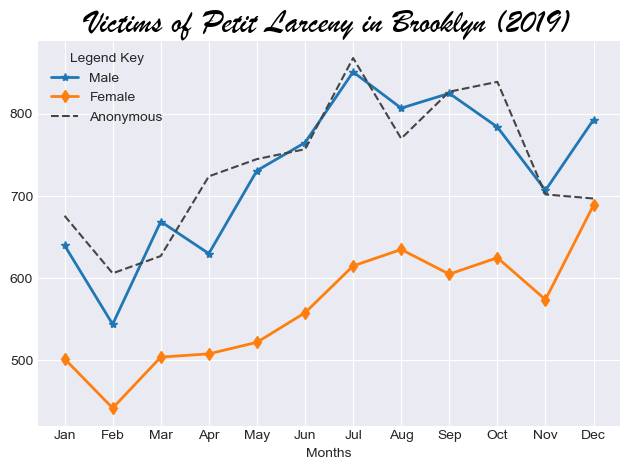

In [46]:
plt.rcdefaults() # reset rc parameters
plt.style.use('seaborn-dark') # style for chart

# values for x axis
months_x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# values for y axos
m_y = [640, 544, 669, 630, 731, 765, 851, 807, 825, 784, 707, 793]
plt.plot(months_x, m_y, label = 'Male', linewidth=2, marker='*')
# passed label, marker and line arguements

f_y = [502, 442, 504, 508, 522, 558, 615, 635, 605, 625, 574, 689]
plt.plot(months_x, f_y, label = 'Female', linewidth=2, marker='d') 

a_y = [676, 606, 627, 724, 745, 757, 868, 770, 827 ,839 ,702 ,697]
plt.plot(months_x, a_y, color='#444444', linestyle ='--', label = 'Anonymous') 
# passed color argument using hex color code

plt.xlabel('Months')

#formatting
plt.title('Victims of Petit Larceny in Brooklyn (2019)',fontsize=24, color="black",
          fontname='Brush Script MT')

plt.legend(title = 'Legend Key')

plt.grid(True) #adds gridlines
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5) # sizes chart

### *4. Conclusion*

In 2019, Brooklyn had the most complaints (131,698) reported in New York City, which was driven mostly by Petit Larcerny (24,384) also known as petty theft. Males were targeted the most and petty theft was the highest during the summer months, peaking in July. December also saw an influx of complaints especially by female victims.

In [47]:
from pivottablejs import pivot_ui
pivot_ui(nypd4)